# fixed-SST forcing

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os

In [5]:
# print out models and members where I have fixed-SST data:
experiments = {}
directory = '../Processed_data/Global_annual_means/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    for exp in modelexp_names:
        if exp in ['piClim-control', 'piClim-4xCO2']:
            experiments[model][exp] = {}
            modelexpdirectory = os.path.join(modeldirectory, exp)
            filenames = [f.name for f in os.scandir(modelexpdirectory) if f.name !='.ipynb_checkpoints']

            members = [file.rsplit('_')[2] for file in filenames]
            members.sort()
            experiments[model][exp] = members
    if bool(experiments[model]) == False: # delete element if empty
        del experiments[model]
        
experiments


{'NorESM2-LM': {'piClim-control': ['r1i1p1f1', 'r1i1p2f1'],
  'piClim-4xCO2': ['r1i1p1f1', 'r1i1p2f1']},
 'ACCESS-ESM1-5': {'piClim-control': ['r1i1p1f1'],
  'piClim-4xCO2': ['r1i1p1f1']},
 'HadGEM3-GC31-LL': {'piClim-control': ['r1i1p1f3'],
  'piClim-4xCO2': ['r1i1p1f3']},
 'CESM2': {'piClim-control': ['r1i1p1f1'], 'piClim-4xCO2': ['r1i1p1f1']},
 'CESM2-WACCM': {'piClim-control': ['r1i2p1f1']},
 'MPI-ESM1-2-LR': {'piClim-control': ['r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'],
  'piClim-4xCO2': ['r1i1p1f1']},
 'GISS-E2-1-G': {'piClim-control': ['r1i1p1f1', 'r1i1p1f2', 'r1i1p3f1'],
  'piClim-4xCO2': ['r1i1p1f2']},
 'CNRM-CM6-1': {'piClim-control': ['r1i1p1f2'], 'piClim-4xCO2': ['r1i1p1f2']},
 'MRI-ESM2-0': {'piClim-control': ['r1i1p1f1'], 'piClim-4xCO2': ['r1i1p1f1']},
 'EC-Earth3': {'piClim-control': ['r1i1p1f1'], 'piClim-4xCO2': ['r1i1p1f1']},
 'IPSL-CM6A-LR': {'piClim-control': ['r1i1p1f1',
   'r2i1p1f1',
   'r3i1p1f1',
   'r4i1p1f1',
   'r5i1p1f1'],
  'piClim-4xCO2': ['r1i1p1f1',
   'r2i1p1

In [11]:
model = 'MRI-ESM2-0'
member = 'r1i1p1f1'

filename = model + '_piClim-4xCO2_' + member + '_means.txt'
file = os.path.join('../Processed_data/Global_annual_means/', model, 'piClim-4xCO2', filename)
piClim4xCO2data = pd.read_table(file, index_col=0, sep = ',')

filename = model + '_piClim-control_' + member + '_means.txt'
file = os.path.join('../Processed_data/Global_annual_means/', model, 'piClim-control', filename)
piClimcontroldata = pd.read_table(file, index_col=0, sep = ',')

N_4xCO2 = piClim4xCO2data['rsdt'] - piClim4xCO2data['rsut'] - piClim4xCO2data['rlut']
N_control = piClimcontroldata['rsdt'] - piClimcontroldata['rsut'] - piClimcontroldata['rlut']

T_4xCO2 = piClim4xCO2data['tas']
T_control = piClimcontroldata['tas']

7.657770404021576


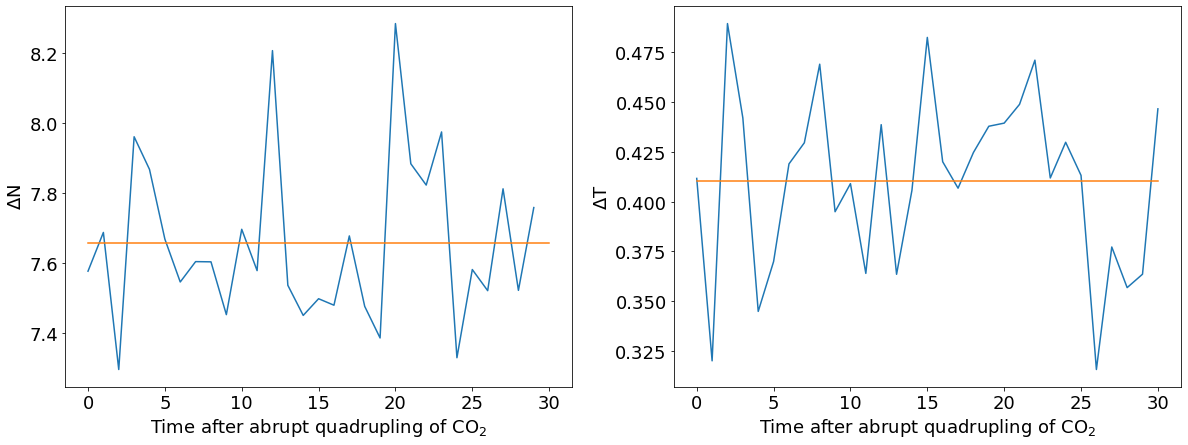

In [12]:
fig, ax = plt.subplots(ncols = 2, figsize = [20,7])
deltaN = N_4xCO2 - np.mean(N_control)
F = np.mean(deltaN)
print(F)
ax[0].plot(deltaN)
ax[0].plot(np.repeat(F,len(deltaN)));
ax[0].set_ylabel('$\Delta$N',fontsize = 18)

deltaT = T_4xCO2 - np.mean(T_control)
T = np.mean(deltaT)

ax[1].plot(deltaT)
ax[1].plot(np.repeat(T,len(deltaT)));
ax[1].set_ylabel('$\Delta$T',fontsize = 18)

for axis in ax:
    axis.set_xlabel('Time after abrupt quadrupling of CO$_2$',fontsize = 18)
    axis.tick_params(axis='both',labelsize=18)  

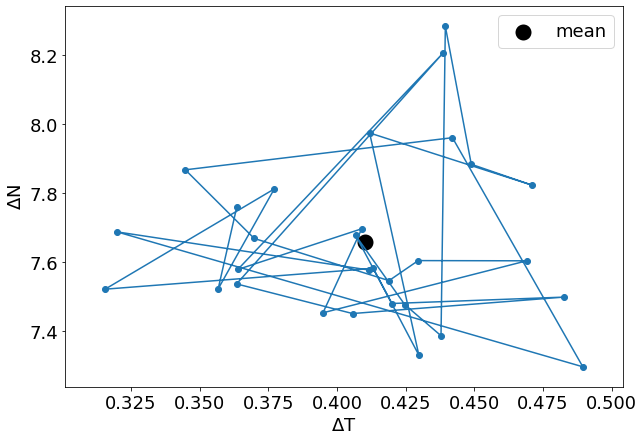

In [13]:
fig, ax2 = plt.subplots(figsize = [10,7])
ax2.scatter(deltaT, deltaN)
ax2.plot(deltaT, deltaN)
ax2.scatter(T, F, linewidth=10, color = "black", label = 'mean');
ax2.set_ylabel('$\Delta$N',fontsize = 18)
ax2.set_xlabel('$\Delta$T',fontsize = 18)
ax2.tick_params(axis='both',labelsize=18)
ax2.legend(fontsize = 18);


In [18]:
# save data in dataframe
filename = 'fixed_SST_forcing_estimates.txt'

columnnames = ['member', 'F_4xCO2', '$\Delta$T'];
dataframe = pd.DataFrame([np.concatenate((member, F, T), axis=None)], index = [model], columns=columnnames)
#dataframe.to_csv('../Estimates/' + filename, sep='\t') # if a new file needs to be created

# if file exists already, load instead exising file and append results: 
loaded_dataframe = pd.read_table('../Estimates/' + filename,index_col=0)
loaded_dataframe = loaded_dataframe.append(dataframe)
loaded_dataframe = loaded_dataframe.sort_index()
loaded_dataframe.to_csv('../Estimates/' + filename, sep='\t')


In [29]:
loaded_dataframe

,member,F_4xCO2,$\Delta$T
ACCESS-CM2,r1i1p1f1,7.950594,0.454325
ACCESS-ESM1-5,r1i1p1f1,7.040336,0.438467
CESM2,r1i1p1f1,8.897779,0.589696
CNRM-CM6-1,r1i1p1f2,7.984872,0.513959
CNRM-ESM2-1,r1i1p1f2,7.643613,0.458781
CanESM5,r1i1p2f1,7.604644,0.496559
EC-Earth3,r1i1p1f1,8.094497,0.495731
GFDL-CM4,r1i1p1f1,8.233804,0.551497
GFDL-ESM4,r1i1p1f1,7.734996,0.445296
GISS-E2-1-G,r1i1p1f2,7.273292,0.541341
